a.	Summarize the total power generation capacity by fuel 
and the total electricity generation in 2021. Present totals and percentages as shown in the table below.

In [2]:
#### Import libraries
#pivot table learning# https://github.com/dpatinoecheverri/ENV717_S23/blob/main/Assignments/A02/ENV717_A2_Solution.ipynb
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_plnt =pd.read_excel("Desktop/717/data/eGRID2021_data.xlsx", 
                       sheet_name="PLNT21",keep_default_na=False,header=1)
df_plnt.head(5)

,SEQPLT,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
0,1,2021,AK,Agrium Kenai Nitrogen Operations,54452,Homer Electric Assn Inc,19558,Agrium US Inc,179,Industrial CHP,...,,,,,,,,,,
1,2,2021,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,,,,,,,,,,
2,3,2021,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
3,4,2021,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0,0,0,0,0,1,0,0,1,0
4,5,2021,AK,Angoon,7462,"Inside Passage Elec Coop, Inc",18963,"Inside Passage Elec Coop, Inc",18963,Electric Utility,...,0,0,0,0,0,1,0,0,1,0


In [4]:
#下面要转换一下数据格式
df_plnt.CAPFAC=pd.to_numeric(df_plnt.CAPFAC)
df_plnt.NAMEPCAP=pd.to_numeric(df_plnt.NAMEPCAP)
df_plnt.PLHTIAN=pd.to_numeric(df_plnt.PLHTIAN)
df_plnt.PLNGENAN=pd.to_numeric(df_plnt.PLNGENAN)
df_plnt.PLCO2EQA=pd.to_numeric(df_plnt.PLCO2EQA)

In [5]:
df_plnt_all = df_plnt.loc[:,['PNAME', 'PSTATABB', 'PLFUELCT','BANAME', 
                              'CAPFAC','NAMEPCAP', 'PLHTIAN','PLNGENAN','PLCO2EQA']].copy()
df_plnt_all.head(n=10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA
0,Agrium Kenai Nitrogen Operations,AK,GAS,No balancing authority,NaN,12.5,NaN,NaN,NaN
1,Alakanuk,AK,OIL,No balancing authority,0.00000,0.8,NaN,0.000,NaN
2,Allison Creek Hydro,AK,HYDRO,No balancing authority,0.30824,6.5,NaN,17551.000,NaN
3,Ambler,AK,OIL,No balancing authority,0.13470,1.1,13418.999,1298.000,1099.588
4,Angoon,AK,OIL,No balancing authority,0.13257,1.5,17910.000,1742.001,1467.592
5,Aniak,AK,OIL,No balancing authority,0.11841,2.2,26685.000,2282.000,2186.640
6,Annex Creek,AK,HYDRO,No balancing authority,0.74152,4.0,NaN,25983.000,NaN
7,Auke Bay,AK,OIL,No balancing authority,0.00000,36.2,2141.000,-354.000,175.439
8,Aurora Energy LLC Chena,AK,COAL,No balancing authority,0.73522,27.5,1663630.766,177115.000,179297.689
9,Barrow,AK,GAS,No balancing authority,0.26616,20.3,748193.999,47331.001,43773.047


In [6]:
#should filter out ISO New England’s power generation assets
df_newE= df_plnt_all[(df_plnt_all.BANAME =="ISO New England Inc.")].copy()
df_newE.head(n=10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA
2297,Adams Solar,CT,SOLAR,ISO New England Inc.,0.15845,1.0,NaN,1388.00,NaN
2298,"Advance Stores Company, Inc",CT,SOLAR,ISO New England Inc.,0.12968,1.0,NaN,1136.00,NaN
2299,ALDI DC 2,CT,SOLAR,ISO New England Inc.,0.13917,1.2,NaN,1463.00,NaN
2300,Alfred L Pierce Generating Station,CT,GAS,ISO New England Inc.,0.00694,84.0,58953.109,5104.00,3561.984
2301,"Algonquin Power Windsor Locks, LLC",CT,GAS,ISO New England Inc.,0.21664,71.0,149209.734,134738.82,8952.359
2302,Amazon BDL3 Solar Project,CT,SOLAR,ISO New England Inc.,0.00046,1.0,NaN,4.00,NaN
2303,Antares-GRE 314 East Lyme LLC,CT,SOLAR,ISO New England Inc.,0.17286,4.0,NaN,6057.00,NaN
2304,Backus Microgrid Project,CT,OIL,ISO New England Inc.,0.01045,10.4,9591.000,952.00,785.911
2305,Barrett Farm Solar - Phase I,CT,SOLAR,ISO New England Inc.,0.17741,1.7,NaN,2642.00,NaN
2306,Barrow Solar,CT,SOLAR,ISO New England Inc.,0.09189,2.0,NaN,1610.00,NaN


BIOMASS

In [23]:
# Filter plants belong to different kinds of feul
#Biomass
#Coal
#Gas
#Geothermal
#Hydro
#Nuclear
#Oil
#Other fossil fuel
#Solar
#Wind
#Other fuel

# total installed capacity in ISONE, total generation capacity in ISONE
df_newE_capacity= df_newE.NAMEPCAP.sum()
df_newE_gen =df_newE.PLNGENAN.sum()
print("total installed capacity in ISONE, total generation capacity in ISONE")
print("Total installed capacity  : {:,.2f} MW".format(df_newE_capacity))
print("Electricity Generation: {:,.2f} MWh\n".format(df_newE_gen))

#biomass

df_newE_Biomass = df_newE[(df_newE.PLFUELCT =="BIOMASS")].copy()

biomass_total_capacity = df_newE_Biomass.NAMEPCAP.sum()
biomass_total_gen = df_newE_Biomass.PLNGENAN.sum()
biomass_cappro= (biomass_total_capacity / df_newE_capacity)*100
biomass_genpro=(biomass_total_gen / df_newE_gen)*100

#biomass

print("biomass plants in ISO new England")
print("Total installed capacity: {:,.2f} MW".format(biomass_total_capacity))
print("{:,.2f}%".format(biomass_cappro))
print("Electricity Generation : {:,.2f} MWh".format(biomass_total_gen))
print("{:,.2f}%".format(biomass_genpro))
      


total installed capacity in ISONE, total generation capacity in ISONE
Total installed capacity  : 39,710.80 MW
Electricity Generation: 102,514,115.76 MWh

biomass plants in ISO new England
Total installed capacity: 1,405.40 MW
3.54%
Electricity Generation : 6,940,133.26 MWh
6.77%


In [25]:
# coal
df_newE_COAL = df_newE[(df_newE.PLFUELCT =="COAL")].copy()

COAL_total_capacity = df_newE_COAL.NAMEPCAP.sum()
COAL_total_gen =df_newE_COAL.PLNGENAN.sum()
COAL_cappro= (COAL_total_capacity / df_newE_capacity)*100
COAL_genpro=(COAL_total_gen / df_newE_gen)*100

print("coal plants in ISO new England")
print("Total installed capacity  : {:,.2f} MW".format(COAL_total_capacity))
print("{:,.2f}%".format(COAL_cappro))
print("Electricity Generation: {:,.2f} MWh".format(COAL_total_gen))
print("{:,.2f}%\n".format(COAL_genpro))

#gas
df_newE_GAS = df_newE[(df_newE.PLFUELCT =="GAS")].copy()

GAS_total_capacity = df_newE_GAS.NAMEPCAP.sum()
GAS_total_gen =df_newE_GAS.PLNGENAN.sum()
GAS_cappro= (GAS_total_capacity / df_newE_capacity)*100
GAS_genpro=(GAS_total_gen / df_newE_gen)*100


print("gas plants in ISO new England")
print("Total installed capacity  : {:,.2f} MW".format(GAS_total_capacity))
print("{:,.2f}%".format(GAS_cappro))
print("Electricity Generation: {:,.2f} MWh".format(GAS_total_gen))
print("{:,.2f}%\n".format(GAS_genpro))



#HYDRO
df_newE_HYDRO = df_newE[(df_newE.PLFUELCT =="HYDRO")].copy()

HYDRO_total_capacity = df_newE_HYDRO.NAMEPCAP.sum()
HYDRO_total_gen =df_newE_HYDRO.PLNGENAN.sum()
HYDRO_cappro= (HYDRO_total_capacity / df_newE_capacity)*100
HYDRO_genpro=(HYDRO_total_gen / df_newE_gen)*100

print("HYDRO plants in ISO new England")
print("Total installed capacity  : {:,.2f} MW".format(HYDRO_total_capacity))
print("{:,.2f}%".format(HYDRO_cappro))
print("Electricity Generation: {:,.2f} MWh".format(HYDRO_total_gen))
print("{:,.2f}%\n".format(HYDRO_genpro))


coal plants in ISO new England
Total installed capacity  : 496.40 MW
1.25%
Electricity Generation: 285,553.00 MWh
0.28%

gas plants in ISO new England
Total installed capacity  : 22,289.70 MW
56.13%
Electricity Generation: 56,149,245.02 MWh
54.77%

HYDRO plants in ISO new England
Total installed capacity  : 3,837.10 MW
9.66%
Electricity Generation: 5,790,572.89 MWh
5.65%



In [27]:
# loop through a list of fuel types and print the installed capacity and electricity generation for each fuel type 
fuel_types = ["NUCLEAR", "OIL", "OTHF","SOLAR","WIND"]

for fuel in fuel_types:
    df_newE_fuel = df_newE[(df_newE.PLFUELCT == fuel)].copy()
    total_capacity = df_newE_fuel.NAMEPCAP.sum()
    total_gen = df_newE_fuel.PLNGENAN.sum()
    fuel_cappro=(total_capacity / df_newE_capacity)*100
    fuel_genpro=(total_gen / df_newE_gen)*100

      
    print(f"{fuel} plants in ISO New England")
    print("Total installed capacity: {:,.2f} MW".format(total_capacity))
    print("{:,.2f}%".format(fuel_cappro))
    print("Electricity Generation: {:,.2f} MWh".format(total_gen))
    print("{:,.2f}%\n".format(fuel_genpro))


NUCLEAR plants in ISO New England
Total installed capacity: 3,404.90 MW
8.57%
Electricity Generation: 27,072,626.00 MWh
26.41%

OIL plants in ISO New England
Total installed capacity: 4,483.80 MW
11.29%
Electricity Generation: 158,024.59 MWh
0.15%

OTHF plants in ISO New England
Total installed capacity: 42.50 MW
0.11%
Electricity Generation: -844.00 MWh
-0.00%

SOLAR plants in ISO New England
Total installed capacity: 2,228.00 MW
5.61%
Electricity Generation: 2,456,018.00 MWh
2.40%

WIND plants in ISO New England
Total installed capacity: 1,523.00 MW
3.84%
Electricity Generation: 3,662,787.00 MWh
3.57%



In [30]:
df_baseload = df_newE[(df_newE.CAPFAC >= 0.01)&(df_newE.NAMEPCAP>=1)&(df_newE.PLFUELCT!="SOLAR")&(df_newE.PLFUELCT!="WIND")].copy()
df_baseload.head(n=5)
len(df_baseload)

328

In [31]:
df_baseload.head(n=5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA
2301,"Algonquin Power Windsor Locks, LLC",CT,GAS,ISO New England Inc.,0.21664,71.0,1.492097e+05,134738.82,8952.359
2304,Backus Microgrid Project,CT,OIL,ISO New England Inc.,0.01045,10.4,9.591000e+03,952.00,785.911
2309,Bradley Energy Center,CT,GAS,ISO New England Inc.,0.27307,5.8,8.990384e+04,13874.00,5259.818
2312,Bridge Street 1 & 2,CT,OIL,ISO New England Inc.,0.01098,5.2,5.239000e+03,500.00,429.298
2313,Bridgeport Energy,CT,GAS,ISO New England Inc.,0.50379,520.0,1.593573e+07,2294863.00,948030.373


In [32]:
df_baseload['short-run marginal cost']=0
df_baseload.loc[df_baseload.PLFUELCT=='NUCLEAR','short-run marginal cost']=9
df_baseload.loc[df_baseload.PLFUELCT=='HYDRO','short-run marginal cost']=0

In [33]:
df_baseload.loc[df_baseload.PLFUELCT=='COAL','short-run marginal cost']=(1.98*df_baseload.PLHTIAN)/df_baseload.PLNGENAN
df_baseload.loc[df_baseload.PLFUELCT=='GAS','short-run marginal cost']=(5.2*df_baseload.PLHTIAN)/df_baseload.PLNGENAN
df_baseload.loc[df_baseload.PLFUELCT=='OIL','short-run marginal cost']=(10.08*df_baseload.PLHTIAN)/df_baseload.PLNGENAN
df_baseload.loc[df_baseload.PLFUELCT=='BIOMASS','short-run marginal cost']=(12*df_baseload.PLHTIAN)/df_baseload.PLNGENAN


,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost
2301,"Algonquin Power Windsor Locks, LLC",CT,GAS,ISO New England Inc.,0.21664,71.0,1.492097e+05,134738.820,8952.359,5.758479
2304,Backus Microgrid Project,CT,OIL,ISO New England Inc.,0.01045,10.4,9.591000e+03,952.000,785.911,101.551765
2309,Bradley Energy Center,CT,GAS,ISO New England Inc.,0.27307,5.8,8.990384e+04,13874.000,5259.818,33.696118
2312,Bridge Street 1 & 2,CT,OIL,ISO New England Inc.,0.01098,5.2,5.239000e+03,500.000,429.298,105.618240
2313,Bridgeport Energy,CT,GAS,ISO New England Inc.,0.50379,520.0,1.593573e+07,2294863.000,948030.373,36.109251
2314,"Bridgeport Fuel Cell, LLC",CT,GAS,ISO New England Inc.,0.70677,16.6,NaN,102775.000,NaN,NaN
2315,Bridgeport Harbor Station,CT,GAS,ISO New England Inc.,0.44974,994.9,2.674434e+07,3919622.000,1712373.697,35.480610
2317,Bulls Bridge,CT,HYDRO,ISO New England Inc.,0.61977,7.2,NaN,39090.000,NaN,0.000000
2321,CCSU Co-Gen-STBY Gen,CT,GAS,ISO New England Inc.,0.04294,3.6,6.734814e+03,1353.999,437.456,25.864888
2322,CCSU Fuel Cell Project,CT,GAS,ISO New England Inc.,0.75481,1.4,NaN,9257.000,NaN,NaN


In [35]:
# Filter out all the plants that had blank short-run marginal cost in 2021.
df_baseload.dropna(axis='rows', subset=['short-run marginal cost'],inplace=True)
len(df_baseload)

309

In [36]:
# Build an electric power supply curve using baseload power plants
#sort the plants by merit order (i.e., from least fuel cost to higher)
df_baseload=df_baseload.sort_values('short-run marginal cost')
df_baseload.head(5) 

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0


In [38]:
# Now add a new column to calculate the cumulative capacity. Initialize it at zero for all the rows
df_baseload['CumCapacity[MW]']=0

# Make the first row of the CumCapacity column to be equal to the Nameplate capacity of that plant (in that row)
df_baseload.iloc[0,10]=df_baseload.iloc[0,5]
df_baseload.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0,1
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0,0
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0,0
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0,0
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0,0


In [39]:
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,len(df_baseload)):  
                df_baseload.iloc[i,10]=df_baseload.iloc[i-1,10]+df_baseload.iloc[i,5]
df_baseload.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0,1.0
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0,7.4
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0,12.4
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0,180.2
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0,183.4


Text(0, 0.5, '$/MWh')

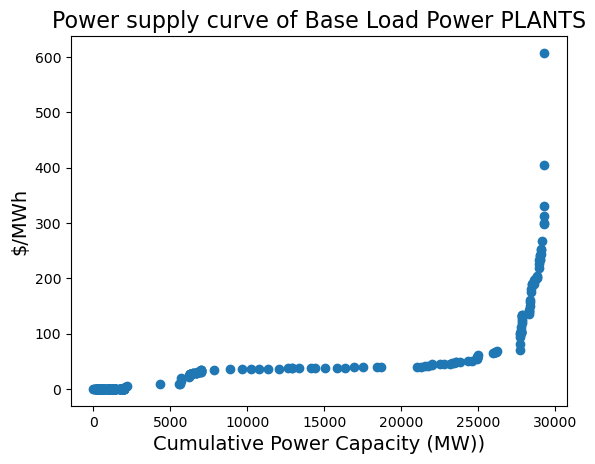

In [40]:
# draw the supply curve, x axis is capacity and y axis is price.
plt.scatter(df_baseload["CumCapacity[MW]"],df_baseload["short-run marginal cost"],marker="o")
plt.title("Power supply curve of Base Load Power PLANTS",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)

In [41]:
df_baseload.iloc[308,10]

29279.199999999997

next is question c (add solar and wind to the question b)

In [44]:
df_c = df_newE[(df_newE.CAPFAC >= 0.01)&(df_newE.NAMEPCAP>=1)].copy()
#df_c.head(n=5)
len(df_c)

958

In [45]:
# calculate marginal cost for all plants in question c
df_c['short-run marginal cost']=0
df_c.loc[df_c.PLFUELCT=='NUCLEAR','short-run marginal cost']=9
df_c.loc[df_c.PLFUELCT=='HYDRO','short-run marginal cost']=0
df_c.loc[df_c.PLFUELCT=='SOLAR','short-run marginal cost']=0
df_c.loc[df_c.PLFUELCT=='WIND','short-run marginal cost']=0
df_c.loc[df_c.PLFUELCT=='COAL','short-run marginal cost']=(1.98*df_c.PLHTIAN)/df_c.PLNGENAN
df_c.loc[df_c.PLFUELCT=='GAS','short-run marginal cost']=(5.2*df_c.PLHTIAN)/df_c.PLNGENAN
df_c.loc[df_c.PLFUELCT=='OIL','short-run marginal cost']=(10.08*df_c.PLHTIAN)/df_c.PLNGENAN
df_c.loc[df_c.PLFUELCT=='BIOMASS','short-run marginal cost']=(12*df_c.PLHTIAN)/df_c.PLNGENAN
df_c.head(10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost
2297,Adams Solar,CT,SOLAR,ISO New England Inc.,0.15845,1.0,NaN,1388.00,NaN,0.000000
2298,"Advance Stores Company, Inc",CT,SOLAR,ISO New England Inc.,0.12968,1.0,NaN,1136.00,NaN,0.000000
2299,ALDI DC 2,CT,SOLAR,ISO New England Inc.,0.13917,1.2,NaN,1463.00,NaN,0.000000
2301,"Algonquin Power Windsor Locks, LLC",CT,GAS,ISO New England Inc.,0.21664,71.0,149209.734,134738.82,8952.359,5.758479
2303,Antares-GRE 314 East Lyme LLC,CT,SOLAR,ISO New England Inc.,0.17286,4.0,NaN,6057.00,NaN,0.000000
2304,Backus Microgrid Project,CT,OIL,ISO New England Inc.,0.01045,10.4,9591.000,952.00,785.911,101.551765
2305,Barrett Farm Solar - Phase I,CT,SOLAR,ISO New England Inc.,0.17741,1.7,NaN,2642.00,NaN,0.000000
2306,Barrow Solar,CT,SOLAR,ISO New England Inc.,0.09189,2.0,NaN,1610.00,NaN,0.000000
2307,Becton Canaan,CT,SOLAR,ISO New England Inc.,0.13078,2.5,NaN,2864.00,NaN,0.000000
2308,Blair Solar,CT,SOLAR,ISO New England Inc.,0.15559,1.0,NaN,1363.00,NaN,0.000000


In [47]:
# Filter out all the plants that had blank short-run marginal cost in 2021.
df_c.dropna(axis='rows', subset=['short-run marginal cost'],inplace=True)
len(df_c)

939

In [46]:
# adjust capacity for solar and wind, use the adjusted colume to generate new supply curve

df_c['adNAMEPCAP']=0
df_c.head(3)



,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,adNAMEPCAP
2297,Adams Solar,CT,SOLAR,ISO New England Inc.,0.15845,1.0,NaN,1388.0,NaN,0.0,0
2298,"Advance Stores Company, Inc",CT,SOLAR,ISO New England Inc.,0.12968,1.0,NaN,1136.0,NaN,0.0,0
2299,ALDI DC 2,CT,SOLAR,ISO New England Inc.,0.13917,1.2,NaN,1463.0,NaN,0.0,0


In [55]:
df_c.loc[(df_c.PLFUELCT!='SOLAR')&(df_c.PLFUELCT!='WIND'),'adNAMEPCAP']=df_c.NAMEPCAP
df_c.head(10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,adNAMEPCAP
2297,Adams Solar,CT,SOLAR,ISO New England Inc.,0.15845,1.0,NaN,1388.00,NaN,0.000000,0.0
2298,"Advance Stores Company, Inc",CT,SOLAR,ISO New England Inc.,0.12968,1.0,NaN,1136.00,NaN,0.000000,0.0
2299,ALDI DC 2,CT,SOLAR,ISO New England Inc.,0.13917,1.2,NaN,1463.00,NaN,0.000000,0.0
2301,"Algonquin Power Windsor Locks, LLC",CT,GAS,ISO New England Inc.,0.21664,71.0,149209.734,134738.82,8952.359,5.758479,71.0
2303,Antares-GRE 314 East Lyme LLC,CT,SOLAR,ISO New England Inc.,0.17286,4.0,NaN,6057.00,NaN,0.000000,0.0
2304,Backus Microgrid Project,CT,OIL,ISO New England Inc.,0.01045,10.4,9591.000,952.00,785.911,101.551765,10.4
2305,Barrett Farm Solar - Phase I,CT,SOLAR,ISO New England Inc.,0.17741,1.7,NaN,2642.00,NaN,0.000000,0.0
2306,Barrow Solar,CT,SOLAR,ISO New England Inc.,0.09189,2.0,NaN,1610.00,NaN,0.000000,0.0
2307,Becton Canaan,CT,SOLAR,ISO New England Inc.,0.13078,2.5,NaN,2864.00,NaN,0.000000,0.0
2308,Blair Solar,CT,SOLAR,ISO New England Inc.,0.15559,1.0,NaN,1363.00,NaN,0.000000,0.0


In [56]:
#Assume that wind and solar resources capacity is equal to their nameplate capacity,
#de-rated by their average 2021 capacity factor
df_c.loc[df_c.PLFUELCT=='SOLAR','adNAMEPCAP']=df_c.NAMEPCAP*df_c.CAPFAC
df_c.loc[df_c.PLFUELCT=='WIND','adNAMEPCAP']=df_c.NAMEPCAP*df_c.CAPFAC
df_c.head(10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,adNAMEPCAP
2297,Adams Solar,CT,SOLAR,ISO New England Inc.,0.15845,1.0,NaN,1388.00,NaN,0.000000,0.158450
2298,"Advance Stores Company, Inc",CT,SOLAR,ISO New England Inc.,0.12968,1.0,NaN,1136.00,NaN,0.000000,0.129680
2299,ALDI DC 2,CT,SOLAR,ISO New England Inc.,0.13917,1.2,NaN,1463.00,NaN,0.000000,0.167004
2301,"Algonquin Power Windsor Locks, LLC",CT,GAS,ISO New England Inc.,0.21664,71.0,149209.734,134738.82,8952.359,5.758479,71.000000
2303,Antares-GRE 314 East Lyme LLC,CT,SOLAR,ISO New England Inc.,0.17286,4.0,NaN,6057.00,NaN,0.000000,0.691440
2304,Backus Microgrid Project,CT,OIL,ISO New England Inc.,0.01045,10.4,9591.000,952.00,785.911,101.551765,10.400000
2305,Barrett Farm Solar - Phase I,CT,SOLAR,ISO New England Inc.,0.17741,1.7,NaN,2642.00,NaN,0.000000,0.301597
2306,Barrow Solar,CT,SOLAR,ISO New England Inc.,0.09189,2.0,NaN,1610.00,NaN,0.000000,0.183780
2307,Becton Canaan,CT,SOLAR,ISO New England Inc.,0.13078,2.5,NaN,2864.00,NaN,0.000000,0.326950
2308,Blair Solar,CT,SOLAR,ISO New England Inc.,0.15559,1.0,NaN,1363.00,NaN,0.000000,0.155590


In [81]:
#df_c=df_c.drop('CumCapacity[MW]',axis=1)
#df_c.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,adNAMEPCAP
2297,Adams Solar,CT,SOLAR,ISO New England Inc.,0.15845,1.0,NaN,1388.0,NaN,0.0,0.158450
4750,Wilbraham,MA,SOLAR,ISO New England Inc.,0.15314,4.0,NaN,5366.0,NaN,0.0,0.612560
4754,Williamsburg,MA,SOLAR,ISO New England Inc.,0.17660,4.0,NaN,6188.0,NaN,0.0,0.706400
4755,Williamsburg Solar LLC VNEM CSG,MA,SOLAR,ISO New England Inc.,0.15961,2.2,NaN,3076.0,NaN,0.0,0.351142
4756,Williamsville Hybrid CSG,MA,SOLAR,ISO New England Inc.,0.01780,8.3,NaN,1294.0,NaN,0.0,0.147740


In [83]:
#sort the plants by merit order (i.e., from least fuel cost to higher)
df_c=df_c.sort_values('short-run marginal cost')

# Now add a new column to calculate the cumulative capacity. Initialize it at zero for all the rows
df_c['CumCapacity[MW]']=0

# Make the first row of the CumCapacity column to be equal to the Nameplate capacity of that plant (in that row)
df_c.iloc[0,11]=df_c.iloc[0,10]
df_c.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,adNAMEPCAP,CumCapacity[MW]
2297,Adams Solar,CT,SOLAR,ISO New England Inc.,0.15845,1.0,NaN,1388.0,NaN,0.0,0.158450,0.15845
4755,Williamsburg Solar LLC VNEM CSG,MA,SOLAR,ISO New England Inc.,0.15961,2.2,NaN,3076.0,NaN,0.0,0.351142,0.00000
4756,Williamsville Hybrid CSG,MA,SOLAR,ISO New England Inc.,0.01780,8.3,NaN,1294.0,NaN,0.0,0.147740,0.00000
4757,Wilmarth Solar,MA,SOLAR,ISO New England Inc.,0.13549,7.3,NaN,8664.0,NaN,0.0,0.989077,0.00000
4758,Wilmington Solar,MA,SOLAR,ISO New England Inc.,0.16438,2.0,NaN,2880.0,NaN,0.0,0.328760,0.00000


In [84]:
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,len(df_c)):  
                df_c.iloc[i,11]=df_c.iloc[i-1,11]+df_c.iloc[i,10]
df_c.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,adNAMEPCAP,CumCapacity[MW]
2297,Adams Solar,CT,SOLAR,ISO New England Inc.,0.15845,1.0,NaN,1388.0,NaN,0.0,0.158450,0.158450
4755,Williamsburg Solar LLC VNEM CSG,MA,SOLAR,ISO New England Inc.,0.15961,2.2,NaN,3076.0,NaN,0.0,0.351142,0.509592
4756,Williamsville Hybrid CSG,MA,SOLAR,ISO New England Inc.,0.01780,8.3,NaN,1294.0,NaN,0.0,0.147740,0.657332
4757,Wilmarth Solar,MA,SOLAR,ISO New England Inc.,0.13549,7.3,NaN,8664.0,NaN,0.0,0.989077,1.646409
4758,Wilmington Solar,MA,SOLAR,ISO New England Inc.,0.16438,2.0,NaN,2880.0,NaN,0.0,0.328760,1.975169


Text(0, 0.5, '$/MWh')

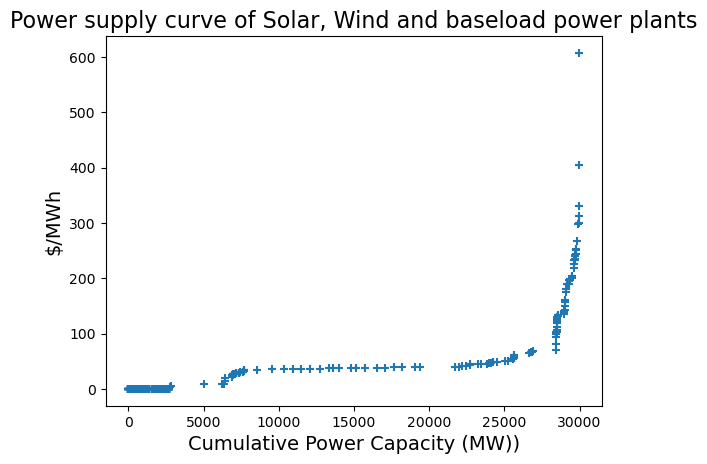

In [85]:
# draw the supply curve, x axis is capacity and y axis is price.
plt.scatter(df_c["CumCapacity[MW]"],df_c["short-run marginal cost"],marker="+")
plt.title("Power supply curve of Solar, Wind and baseload power plants",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)

In [86]:
df_c.iloc[len(df_c)-1,11]

29977.187982999996

In [74]:

# add a new column, adjust capacity for natural gas,only half of the natural gas capacity is available due to fuel supply disruptions
df_baseload['d_adNAMEPCAP']=0

df_baseload.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW],d_adNAMEPCAP
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0,1.0,0
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0,7.4,0
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0,12.4,0
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0,180.2,0
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0,183.4,0


In [77]:

df_baseload.loc[df_baseload.PLFUELCT!='GAS','d_adNAMEPCAP']= df_baseload.NAMEPCAP


In [88]:
df_baseload.loc[df_baseload.PLFUELCT=='GAS','d_adNAMEPCAP']=df_baseload.NAMEPCAP*0.5

# Now add a new column to calculate the cumulative capacity. Initialize it at zero for all the rows
df_baseload['d_CumCapacity[MW]']=0


# Make the first row of the CumCapacity column to be equal to the Nameplate capacity of that plant (in that row)
df_baseload.iloc[0,12]=df_baseload.iloc[0,11]

df_baseload.head(5)


,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW],d_adNAMEPCAP,d_CumCapacity[MW]
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0,1.0,1.0,1
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0,7.4,6.4,0
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0,12.4,5.0,0
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0,180.2,167.8,0
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0,183.4,3.2,0


In [89]:
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,len(df_baseload)):  
               df_baseload.iloc[i,12]=df_baseload.iloc[i-1,12]+df_baseload.iloc[i,11]
df_baseload.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW],d_adNAMEPCAP,d_CumCapacity[MW]
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0,1.0,1.0,1.0
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0,7.4,6.4,7.4
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0,12.4,5.0,12.4
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0,180.2,167.8,180.2
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0,183.4,3.2,183.4


Text(0, 0.5, '$/MWh')

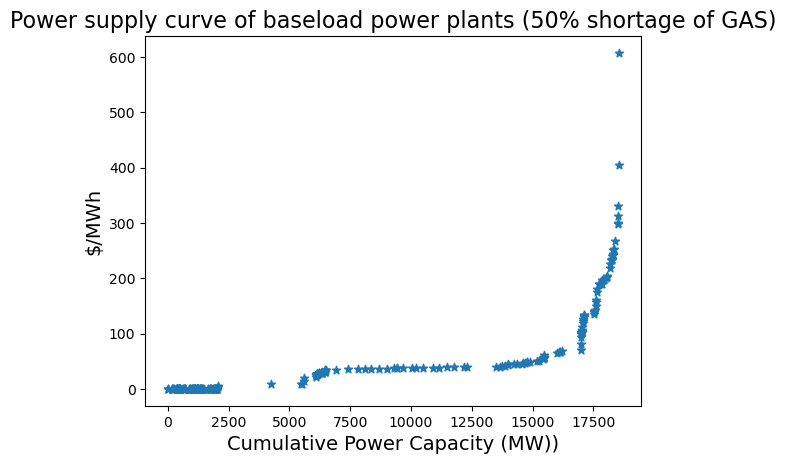

In [90]:
# question d draw the supply curve, x axis is capacity and y axis is price.
plt.scatter(df_baseload["d_CumCapacity[MW]"],df_baseload["short-run marginal cost"],marker="*")
plt.title("Power supply curve of baseload power plants (50% shortage of GAS)",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)

In [92]:
df_baseload.iloc[len(df_baseload)-1,12]

18544.35

e.Repeat d. but consider the situation when supply from nuclear power plants is reduced 
to 70% of the nameplate capacity. What is the highest electricity demand that can be served under these conditions?

In [94]:
# add a new column, adjust capacity for natural gas,only half of the natural gas capacity is available due to fuel supply disruptions
df_baseload['e_adNAMEPCAP']=0

df_baseload.loc[df_baseload.PLFUELCT!='NUCLEAR','e_adNAMEPCAP']= df_baseload.d_adNAMEPCAP
df_baseload.loc[df_baseload.PLFUELCT=='NUCLEAR','e_adNAMEPCAP']= df_baseload.NAMEPCAP*0.7
df_baseload.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW],d_adNAMEPCAP,d_CumCapacity[MW],e_adNAMEPCAP
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0,1.0,1.0,1.0,1.0
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0,7.4,6.4,7.4,6.4
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0,12.4,5.0,12.4,5.0
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0,180.2,167.8,180.2,167.8
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0,183.4,3.2,183.4,3.2


In [95]:
# Now add a new column to calculate the cumulative capacity. Initialize it at zero for all the rows
df_baseload['e_CumCapacity[MW]']=0


# Make the first row of the CumCapacity column to be equal to the Nameplate capacity of that plant (in that row)
df_baseload.iloc[0,14]=df_baseload.iloc[0,13]

df_baseload.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW],d_adNAMEPCAP,d_CumCapacity[MW],e_adNAMEPCAP,e_CumCapacity[MW]
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0,1.0,1.0,1.0,1.0,1
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0,7.4,6.4,7.4,6.4,0
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0,12.4,5.0,12.4,5.0,0
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0,180.2,167.8,180.2,167.8,0
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0,183.4,3.2,183.4,3.2,0


In [96]:
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,len(df_baseload)):  
               df_baseload.iloc[i,14]=df_baseload.iloc[i-1,14]+df_baseload.iloc[i,13]
df_baseload.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW],d_adNAMEPCAP,d_CumCapacity[MW],e_adNAMEPCAP,e_CumCapacity[MW]
10952,Wrightsville Hydro Plant,VT,HYDRO,ISO New England Inc.,0.20959,1.0,NaN,1836.000,NaN,0.0,1.0,1.0,1.0,1.0,1.0
7271,Eastman Falls,NH,HYDRO,ISO New England Inc.,0.44701,6.4,NaN,25061.000,NaN,0.0,7.4,6.4,7.4,6.4,7.4
7270,Dodge Falls Associates,NH,HYDRO,ISO New England Inc.,0.32591,5.0,NaN,14275.000,NaN,0.0,12.4,5.0,12.4,5.0,12.4
7267,Comerford,NH,HYDRO,ISO New England Inc.,0.15643,167.8,NaN,229941.001,NaN,0.0,180.2,167.8,180.2,167.8,180.2
4608,Putts Bridge,MA,HYDRO,ISO New England Inc.,0.37504,3.2,NaN,10513.000,NaN,0.0,183.4,3.2,183.4,3.2,183.4


Text(0.5, -0.02, 'only 50% of GAS and 70% of NUCLEAR')

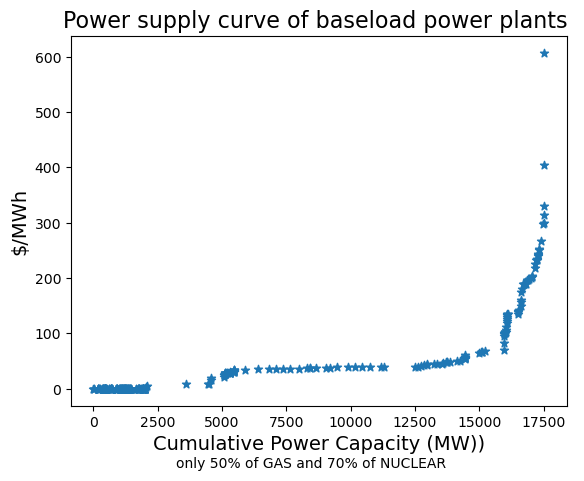

In [99]:
# question d draw the supply curve, x axis is capacity and y axis is price.
plt.scatter(df_baseload["e_CumCapacity[MW]"],df_baseload["short-run marginal cost"],marker="*")
plt.title("Power supply curve of baseload power plants ",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
#Add a caption that makes this plot a stand-alone piece of information
txt2="only 50% of GAS and 70% of NUCLEAR"
plt.figtext(0.5, -0.02, txt2, wrap=True, horizontalalignment='center', fontsize=10)

In [100]:
df_baseload.iloc[len(df_baseload)-1,14]

17522.88